In [35]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx

import os
import sys
import pickle
import seaborn as sns

import re

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

In [36]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
#ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
#ROOT_DIR = "/home/charles.gauvin/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

In [37]:
from OsmnxElev import *

In [38]:
graphQc=loadGraphElevGradesNeighQc()

File exists => reading graph


In [39]:
listSubGraphs,listNodes,dfAll= getSubgraphListAllNeighWithEdgesGrade(graphQc)

In [40]:
graphSJB=listSubGraphs["Saint-Jean-Baptiste"]
#nx.get_edge_attributes(graphSJB,"grade")

In [41]:
dfAll.Neighbourhood.unique()

array(['Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Quartier 4-2',
       'Saint-Émile', 'Cap-Rouge', 'Lairet', 'Maizerets', 'Val-Bélair',
       'Duberger-Les Saules', 'Pointe-de-Sainte-Foy',
       'Neufchâtel-Est/Lebourgneuf', 'Notre-Dame-des-Laurentides',
       'Quartier 5-2', 'Jésuites', 'Vieux-Moulin', 'Lac-Saint-Charles',
       'Montcalm', 'Des Châtels', 'Saint-Roch', 'Chutes-Montmorency',
       'Vieux-Limoilou', 'Quartier 4-6', 'Saint-Sacrement', 'Vanier',
       'Quartier 5-1', "L'Aéroport", 'Quartier 4-3', 'Plateau',
       'Saint-Sauveur', 'Cité Universitaire', 'Quartier 4-5',
       'Saint-Jean-Baptiste', 'Sillery', 'Saint-Louis', 'Quartier 5-4',
       'Loretteville'], dtype=object)

In [42]:
#Get the grade in absolute values
dfAll=dfAll.assign( gradeAbsoluteVal = lambda x :  np.abs(dfAll.grade))
dfAll.head()

Edge   grade  \
0  (2302763016, 2541382786) -0.0115   
1  (2302763016, 1236537740)  0.0186   
2  (2302763016, 2532112767)  0.0062   
3  (2302763022, 1750947803)  0.0116   
4  (2302763022, 1750947799)  0.0503   

                                  Neighbourhood  gradeAbsoluteVal  
0  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0115  
1  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0186  
2  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0062  
3  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0116  
4  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0503

In [43]:
dfAll.shape

(201706, 4)

In [44]:
dfAll.head()

Edge   grade  \
0  (2302763016, 2541382786) -0.0115   
1  (2302763016, 1236537740)  0.0186   
2  (2302763016, 2532112767)  0.0062   
3  (2302763022, 1750947803)  0.0116   
4  (2302763022, 1750947799)  0.0503   

                                  Neighbourhood  gradeAbsoluteVal  
0  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0115  
1  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0186  
2  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0062  
3  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0116  
4  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0503

In [45]:
dfAllNoNas=dfAll.dropna()
dfAllNoNas.shape

(201706, 4)

In [46]:
dfAllNoNas.head()

Edge   grade  \
0  (2302763016, 2541382786) -0.0115   
1  (2302763016, 1236537740)  0.0186   
2  (2302763016, 2532112767)  0.0062   
3  (2302763022, 1750947803)  0.0116   
4  (2302763022, 1750947799)  0.0503   

                                  Neighbourhood  gradeAbsoluteVal  
0  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0115  
1  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0186  
2  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0062  
3  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0116  
4  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.0503

In [47]:
idxneigh=dfAllNoNas["Neighbourhood"]=="Quartier 5-2"
dat=dfAllNoNas.loc[idxneigh,"grade"]
dat.head()

0   -0.0028
1   -0.0407
2    0.0106
3   -0.0010
4    0.0010
Name: grade, dtype: float64

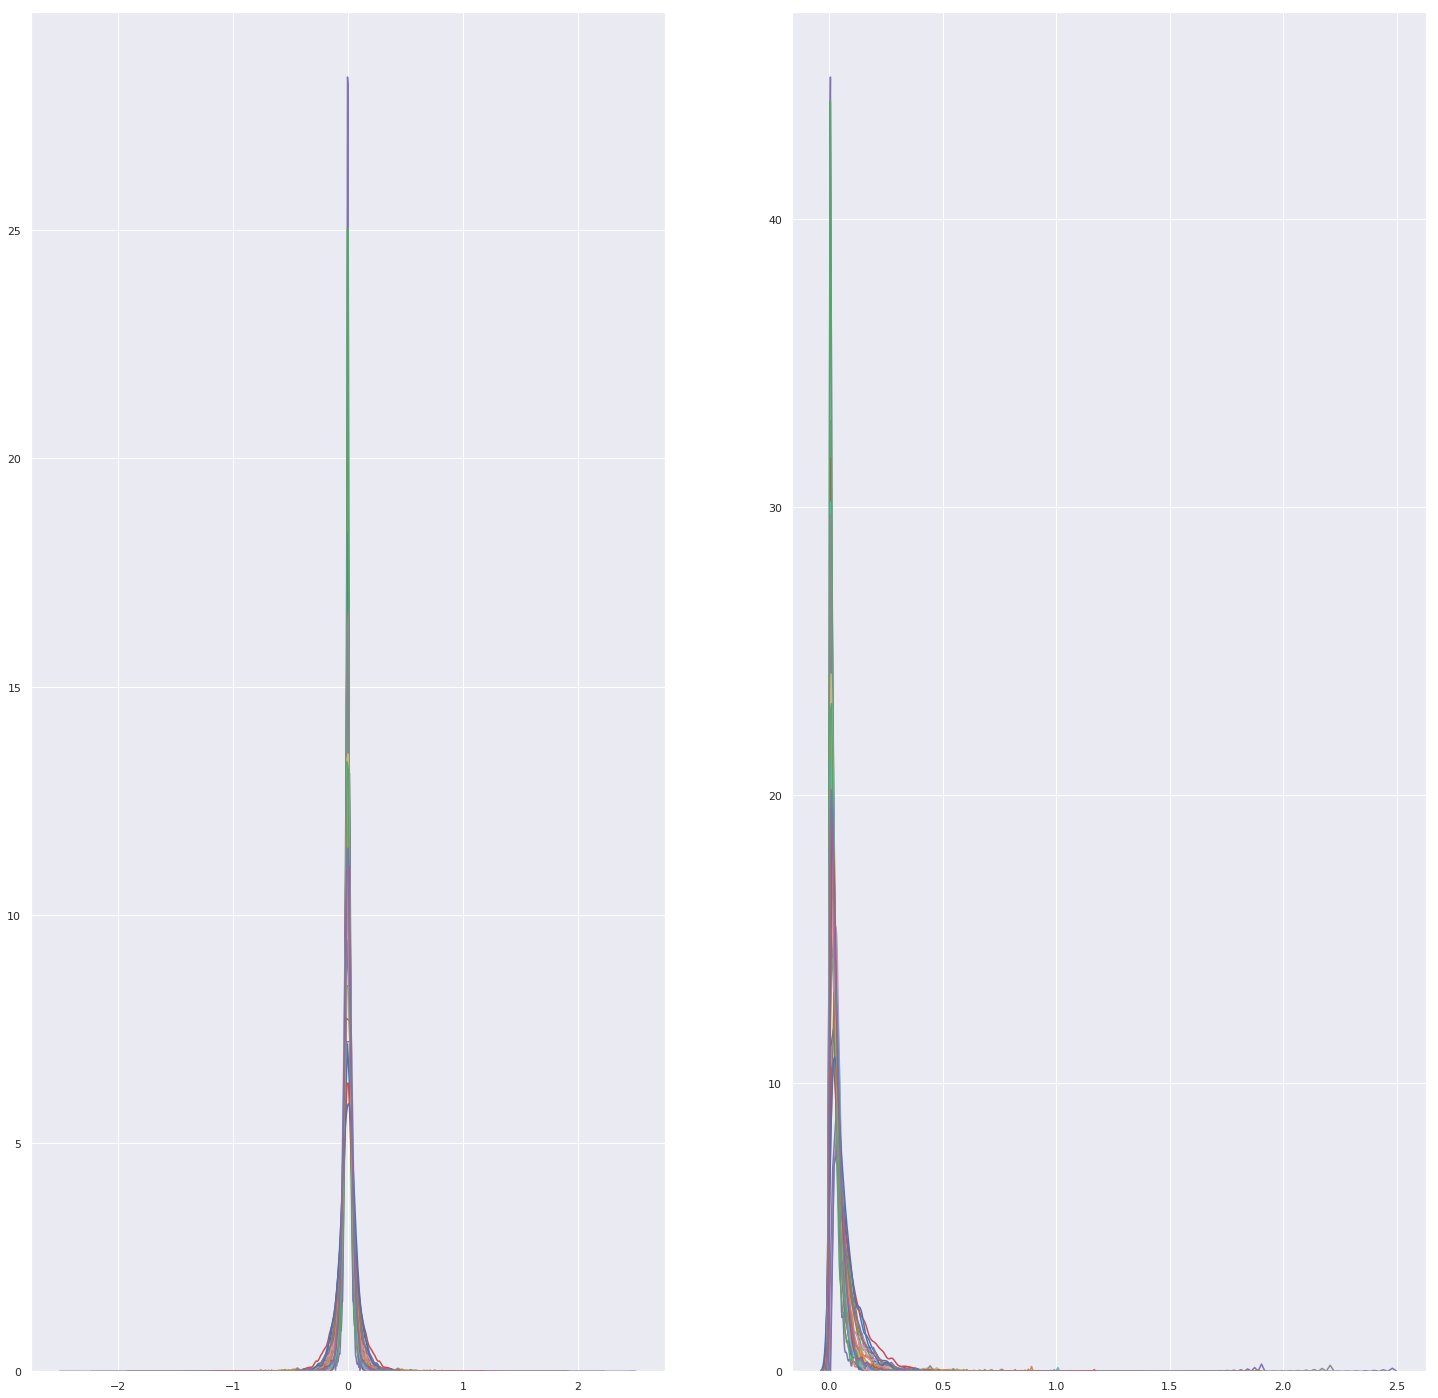

In [48]:
fig=plt.subplot(121)

for neigh in dfAllNoNas["Neighbourhood"].unique():
    idxneigh=dfAllNoNas["Neighbourhood"]==neigh
    dat=dfAllNoNas.loc[idxneigh,"grade"]
    try:
        ax=sns.kdeplot(dat, label=neigh)
    except Exception as e:
        print(str(e))
leg=ax.get_legend()
leg.remove()

fig=plt.subplot(122)
for neigh in dfAllNoNas["Neighbourhood"].unique():
    idxneigh=dfAllNoNas["Neighbourhood"]==neigh
    dat=dfAllNoNas.loc[idxneigh,"gradeAbsoluteVal"]
    try:
        ax=sns.kdeplot(dat, label=neigh)
    except Exception as e:
        print(str(e))
leg=ax.get_legend()
leg.remove()

In [49]:
listCentralNeigh=["Saint-Jean-Baptiste","Saint-Roch","Vieux-Québec/Cap-Blanc/Colline parlementaire"]

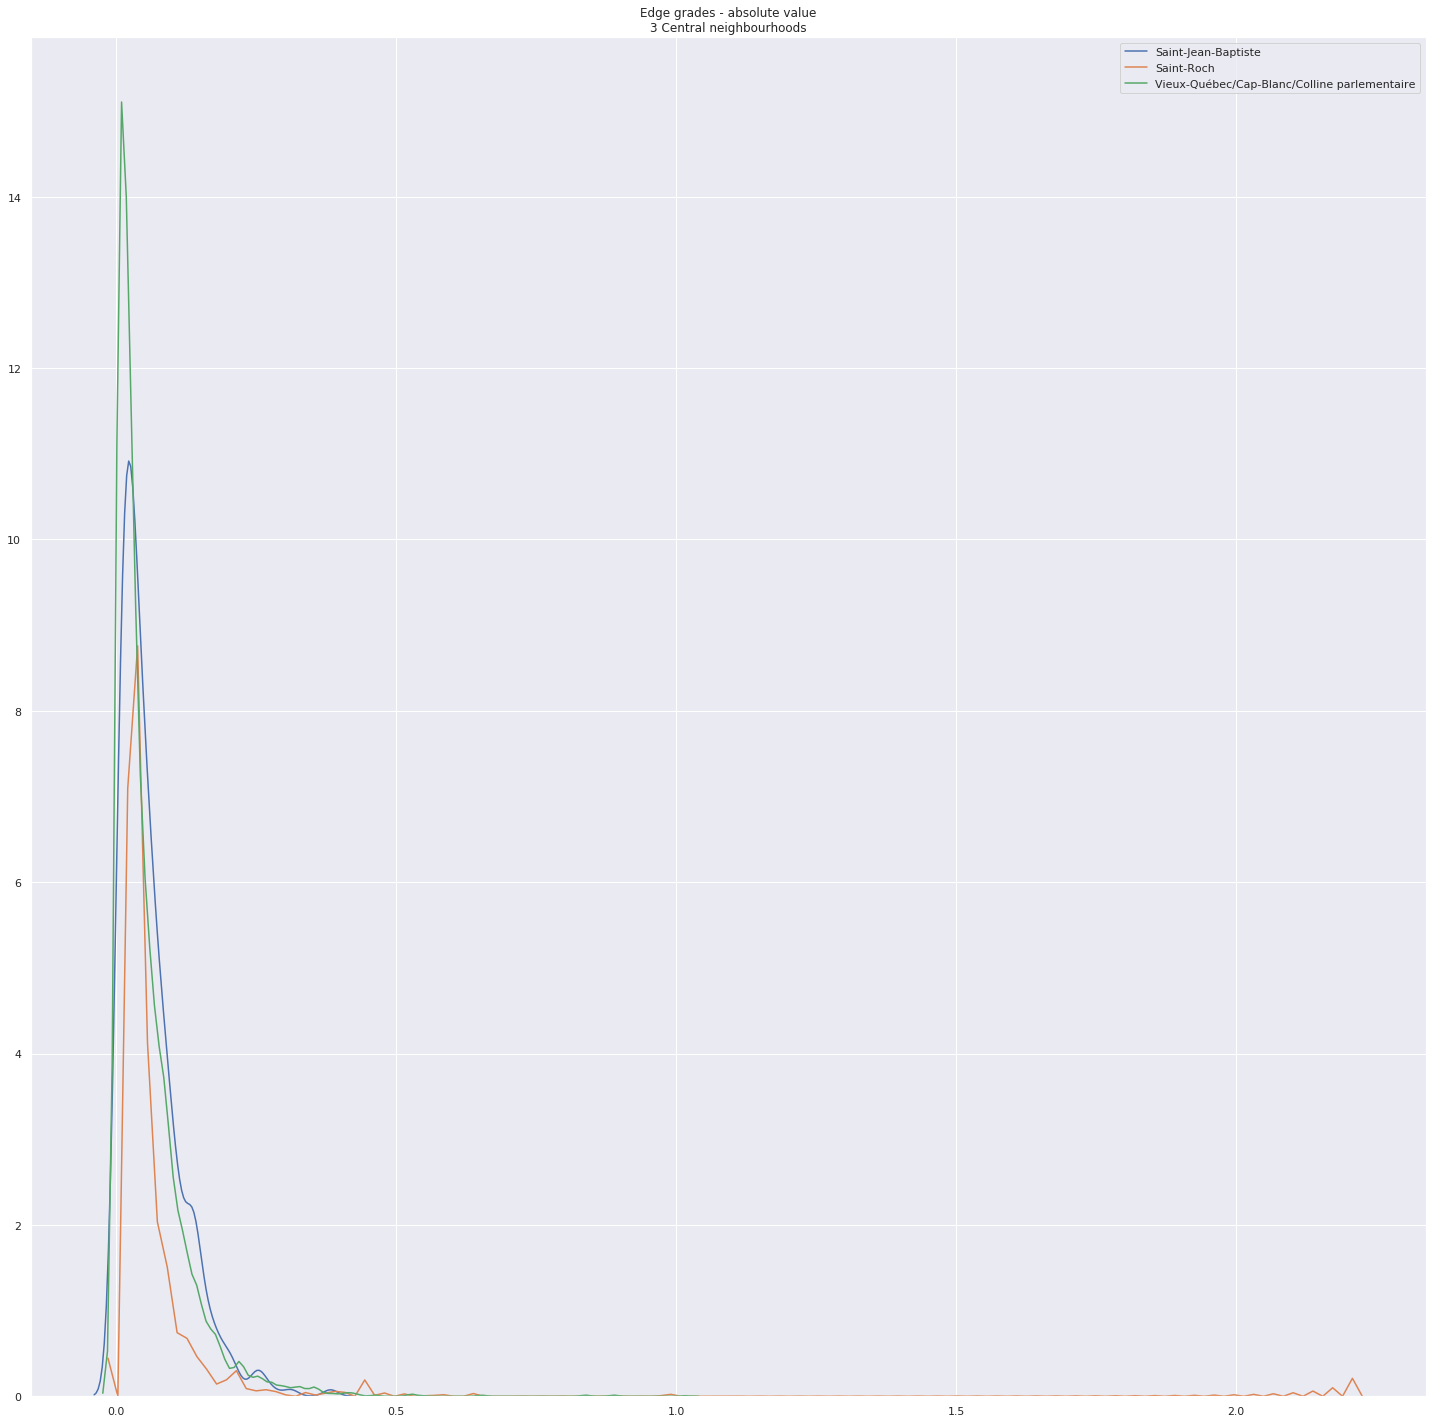

In [50]:
for neigh in listCentralNeigh:
    idxneigh=dfAllNoNas["Neighbourhood"]==neigh
    dat=dfAllNoNas.loc[idxneigh,"gradeAbsoluteVal"]
    try:
        ax=sns.kdeplot(dat, label=neigh)
    except Exception as e:
        print(str(e))
ax.set_title("Edge grades - absolute value\n3 Central neighbourhoods")
plt.savefig(os.path.join(ROOT_DIR,"Figures", "densityGradesAbsValue3Neigh.png"))

In [51]:
dfAvgGradeByNeigh=dfAllNoNas.groupby("Neighbourhood" ).agg({"grade":"mean",
                                                           "gradeAbsoluteVal":"mean"}).reset_index()

In [52]:
dfAvgGradeByNeigh.head()

Neighbourhood     grade  gradeAbsoluteVal
0            Cap-Rouge -0.000046          0.038685
1   Chutes-Montmorency  0.000108          0.035006
2   Cité Universitaire -0.000074          0.032900
3          Des Châtels  0.000147          0.044447
4  Duberger-Les Saules  0.000003          0.025550

In [53]:
dfAvgGradeByNeigh.sort_values(by=["grade"],inplace=True)
dfAllNoNas["Neighbourhood"] = pd.Categorical(dfAllNoNas["Neighbourhood"],
                                             categories=dfAvgGradeByNeigh["Neighbourhood"],
                                             ordered=True)
dfAllNoNas.sort_values(by=["Neighbourhood", "grade"],inplace=True)

In [54]:
dfAllNoNas.head()

Edge   grade  \
6520  (3954236239, 3954212043) -0.8885   
1515  (4726973881, 3390496580) -0.8379   
5109  (1740977732, 1740977705) -0.6526   
1453  (2920949053, 4790081102) -0.5480   
2399    (466553287, 297030900) -0.5279   

                                     Neighbourhood  gradeAbsoluteVal  
6520  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.8885  
1515  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.8379  
5109  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.6526  
1453  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.5480  
2399  Vieux-Québec/Cap-Blanc/Colline parlementaire            0.5279

[Text(0, 0, 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
 Text(0, 0, 'Saint-Sacrement'),
 Text(0, 0, 'Pointe-de-Sainte-Foy'),
 Text(0, 0, 'Sillery'),
 Text(0, 0, 'Montcalm'),
 Text(0, 0, 'Val-Bélair'),
 Text(0, 0, 'Plateau'),
 Text(0, 0, 'Notre-Dame-des-Laurentides'),
 Text(0, 0, 'Quartier 5-2'),
 Text(0, 0, 'Lairet'),
 Text(0, 0, 'Cité Universitaire'),
 Text(0, 0, 'Cap-Rouge'),
 Text(0, 0, 'Vieux-Moulin'),
 Text(0, 0, 'Quartier 5-4'),
 Text(0, 0, 'Loretteville'),
 Text(0, 0, 'Saint-Émile'),
 Text(0, 0, 'Quartier 5-1'),
 Text(0, 0, 'Quartier 4-3'),
 Text(0, 0, 'Lac-Saint-Charles'),
 Text(0, 0, 'Vanier'),
 Text(0, 0, 'Duberger-Les Saules'),
 Text(0, 0, "L'Aéroport"),
 Text(0, 0, 'Jésuites'),
 Text(0, 0, 'Chutes-Montmorency'),
 Text(0, 0, 'Neufchâtel-Est/Lebourgneuf'),
 Text(0, 0, 'Des Châtels'),
 Text(0, 0, 'Saint-Louis'),
 Text(0, 0, 'Maizerets'),
 Text(0, 0, 'Quartier 4-6'),
 Text(0, 0, 'Quartier 4-5'),
 Text(0, 0, 'Saint-Roch'),
 Text(0, 0, 'Vieux-Limoilou'),
 Text(0, 0, 'Quartie

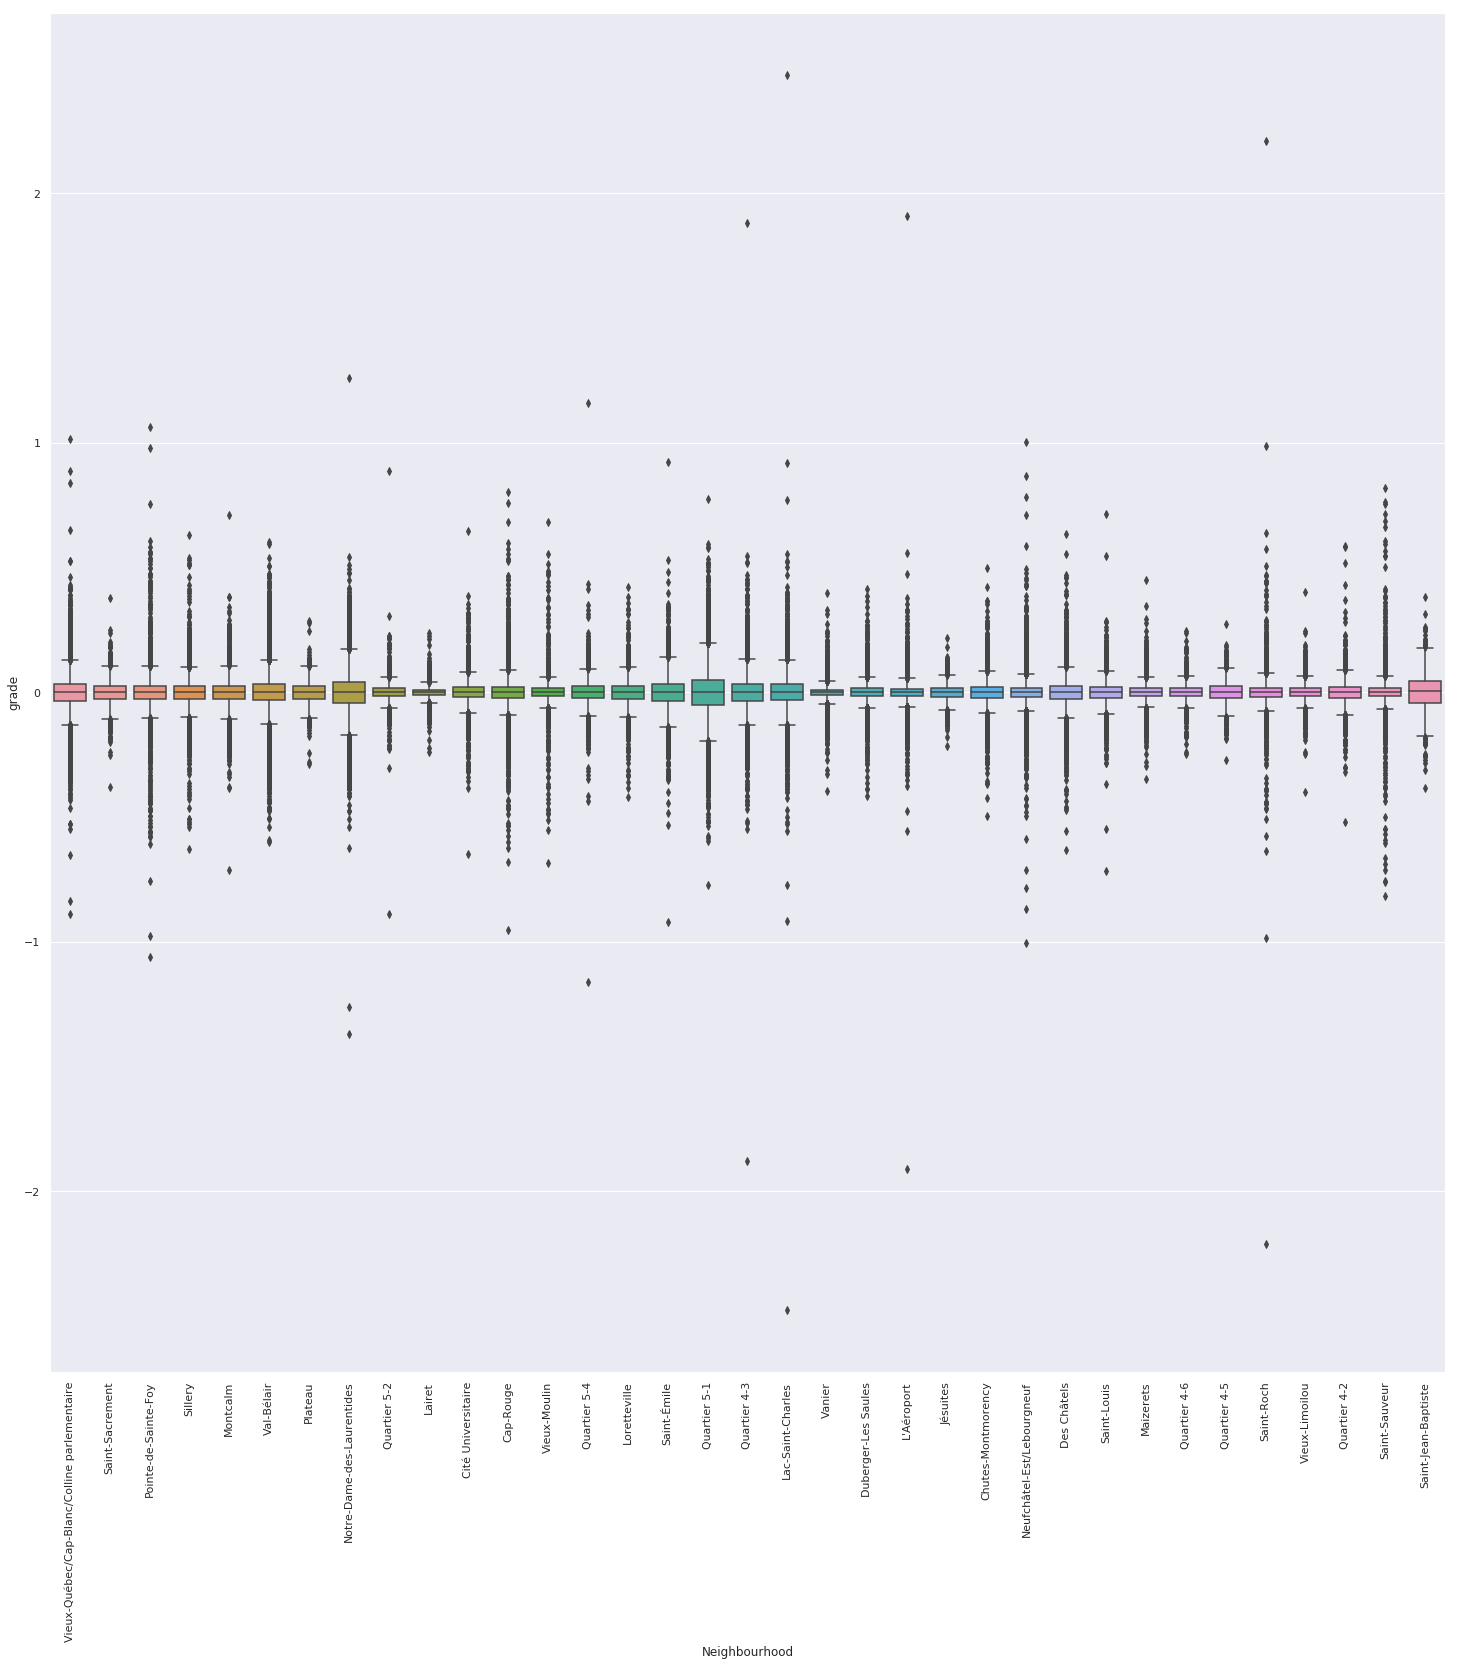

In [55]:
fig=sns.boxplot(x="Neighbourhood" , y="grade", data=dfAllNoNas)
fig.set_xticklabels(rotation=90,labels=dfAvgGradeByNeigh["Neighbourhood"])

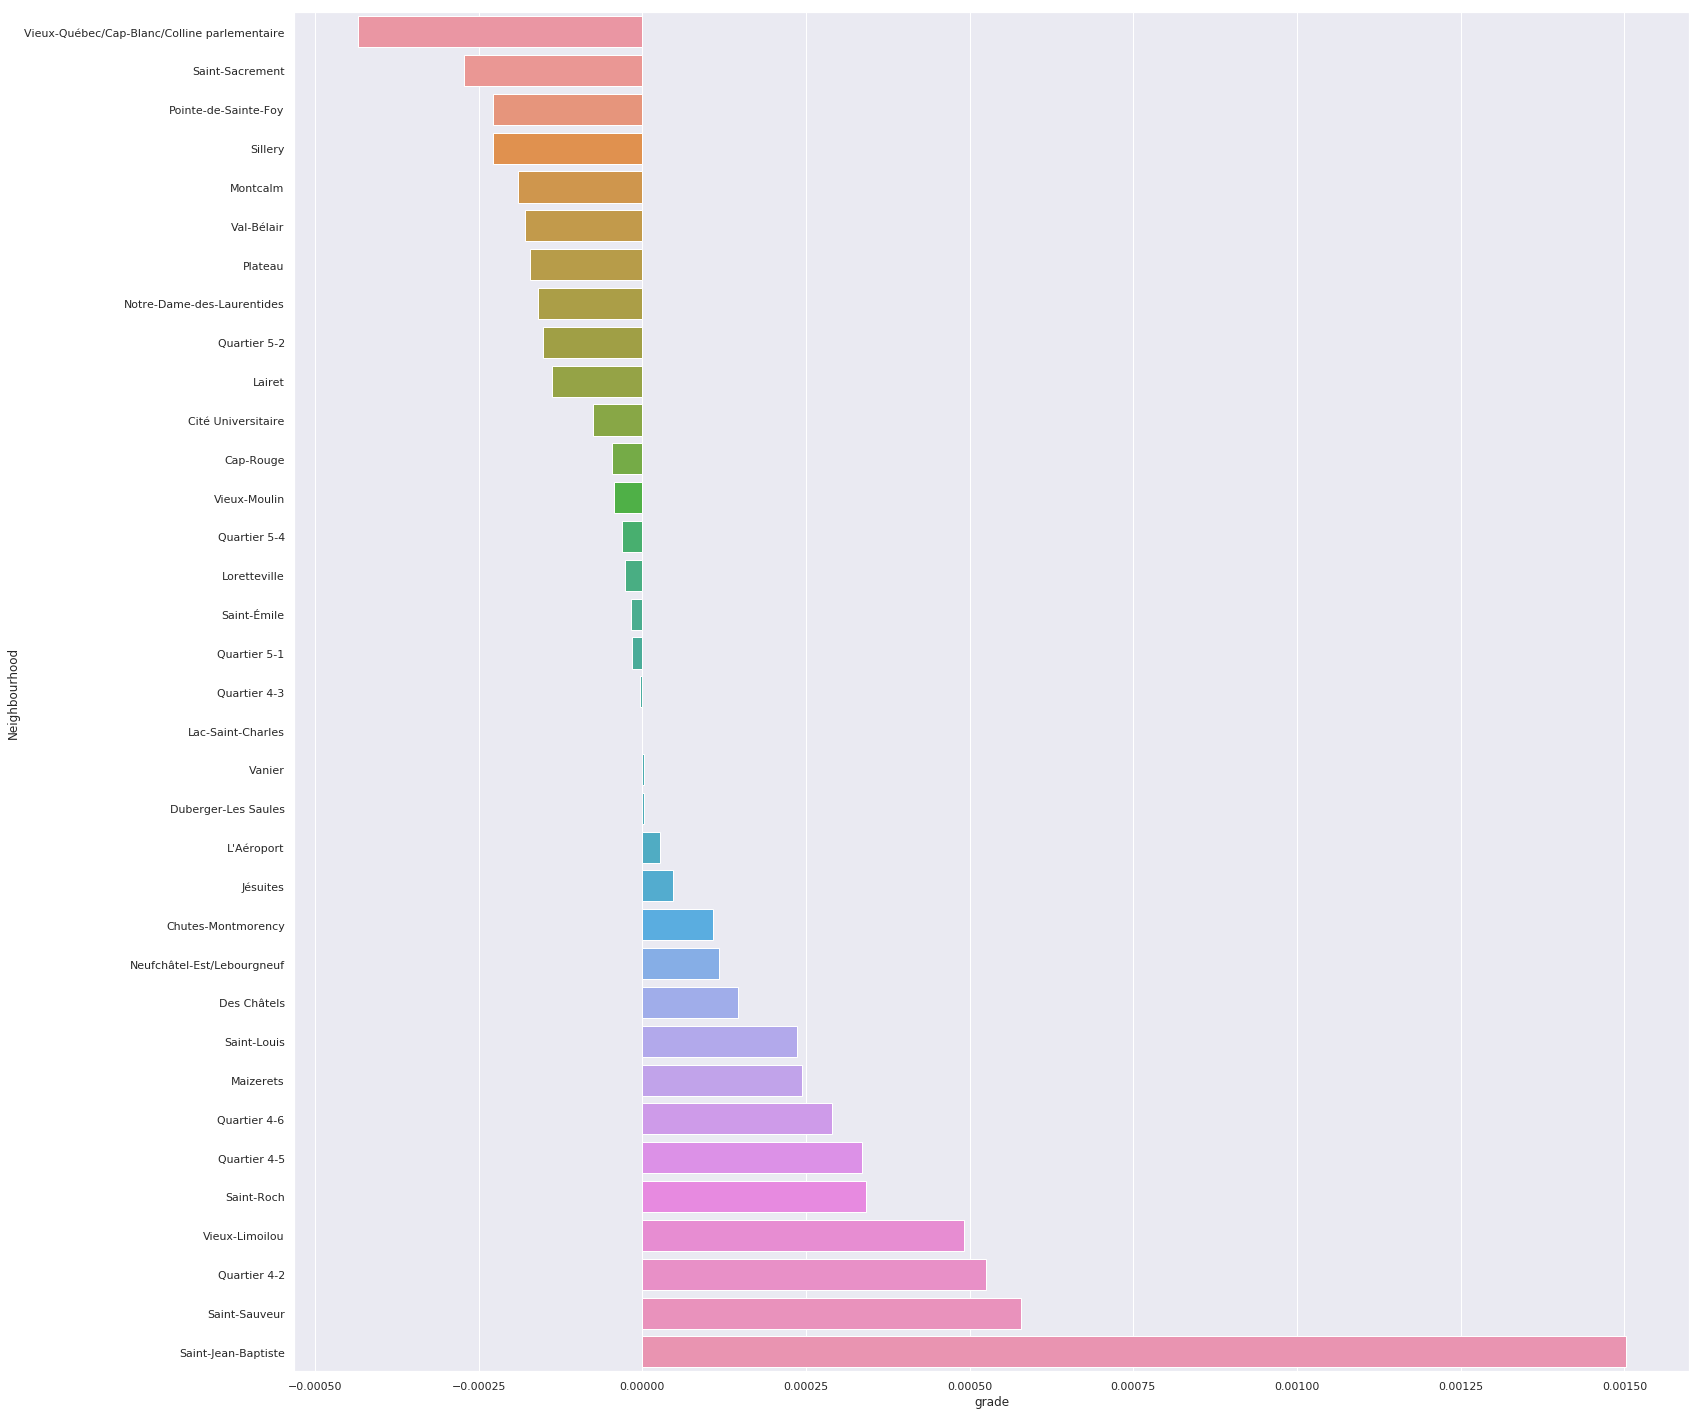

In [56]:
fig=sns.barplot(x="grade",y="Neighbourhood", data=dfAvgGradeByNeigh)
#fig.set_xticklabels(rotation=90,labels=dfAvgGradeByNeigh["Neighbourhood"])

In [57]:
#Sort by abs val
dfAvgGradeByNeigh.sort_values(by=["gradeAbsoluteVal"], inplace=True)
dfAvgGradeByNeigh.head()


Neighbourhood     grade  gradeAbsoluteVal
8         Lairet -0.000138          0.017431
31        Vanier  0.000003          0.021076
21  Quartier 5-2 -0.000152          0.022662
19  Quartier 4-6  0.000289          0.024469
5       Jésuites  0.000047          0.024905

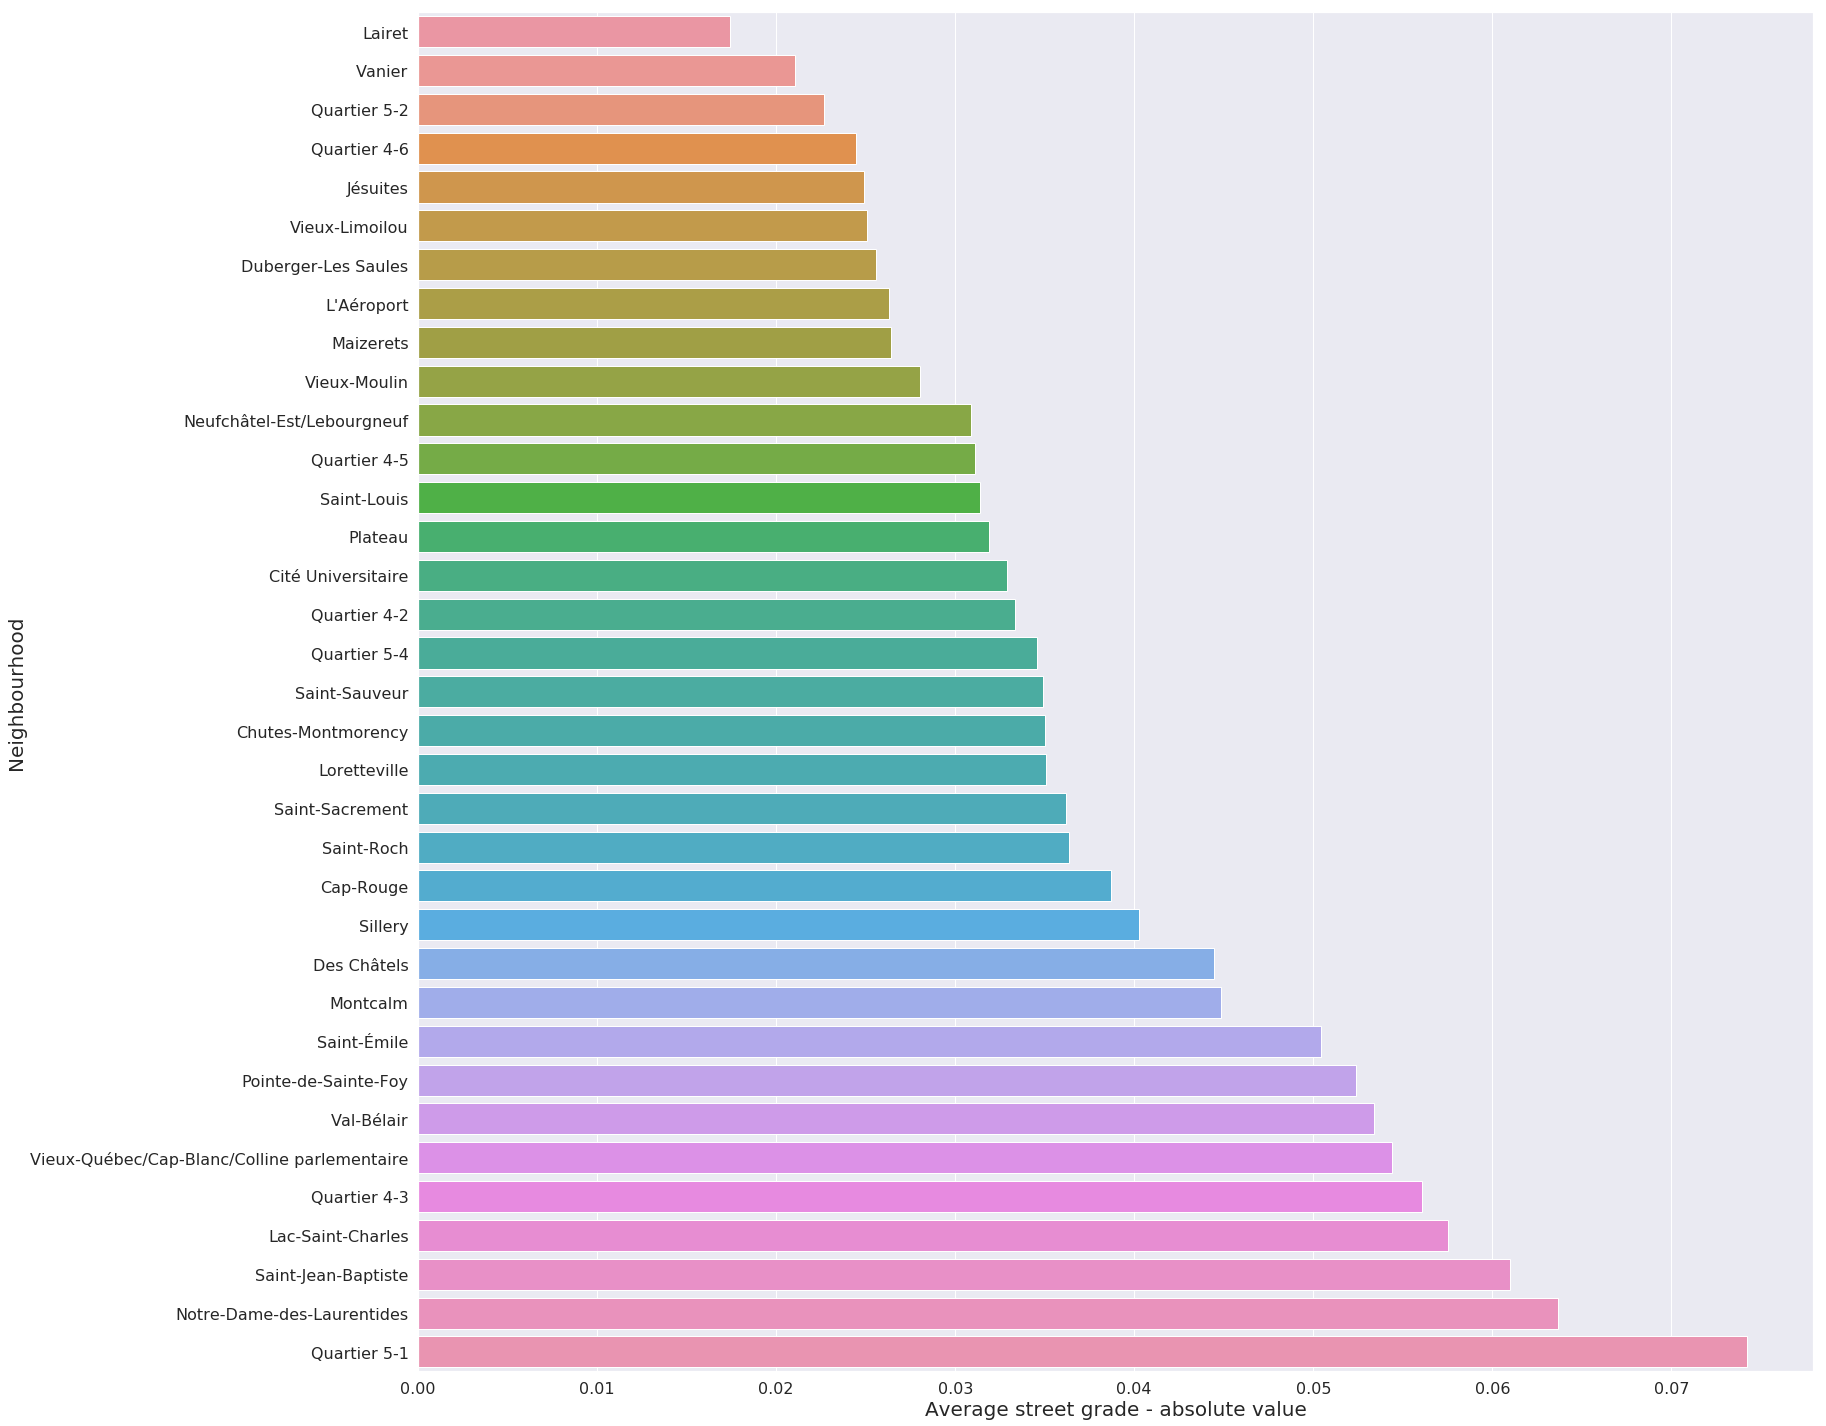

In [70]:
fig=sns.barplot(x="gradeAbsoluteVal",y="Neighbourhood",data=dfAvgGradeByNeigh)
sns.set(rc={'figure.figsize':(25,25)})
fig.set_xlabel("Average street grade - absolute value",fontsize=20)
fig.set_ylabel("Neighbourhood",fontsize=20)
fig.tick_params(labelsize=16)
p=fig.get_figure()
p.savefig( os.path.join(ROOT_DIR,"Figures", "EdgeGrades", "gradeAbsQcByNeigh.png"))

In [59]:
listGradesAbsValue=[ np.log(abs(dat["grade"])) for u,v,dat in graphQc.edges.data() ]
listGradesAbsValue[:2]

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


[-3.8537540973041704, -3.8537540973041704]

In [60]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

normCol=Normalize(vmin=np.min(listGradesAbsValue), vmax=np.max(listGradesAbsValue))
colMap=ScalarMappable(normCol,cmap="plasma")

In [61]:

def plotGraphGrade(graph, numQuantiles=20):
    
    listGradesAbsValue=[ abs(dat["grade"]) for u,v,dat in graph.edges.data() ]

    #Get the quantiles
    series, bins = pd.qcut(x=listGradesAbsValue,
                        q=numQuantiles, 
                        labels=np.linspace(1,numQuantiles,numQuantiles), 
                        retbins=True)

    #Set the color map
    cNorm = matplotlib.colors.Normalize(vmin=1, vmax=numQuantiles)
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)
    colList = [scalarMap.to_rgba(i) for i in range(numQuantiles)]

    #Get the colors
    listEdgeColors=[  getColorFromElev(bins, colList, data["grade"]) for u,v,data in graph.edges(data=True) ]

    
    return(listEdgeColors )

In [62]:
listGradeColors=plotGraphGrade(graphQc)
listGradeColors[:3]

[(0.970533, 0.887896, 0.145919, 1.0),
 (0.714883, 0.187299, 0.546338, 1.0),
 (0.970533, 0.887896, 0.145919, 1.0)]

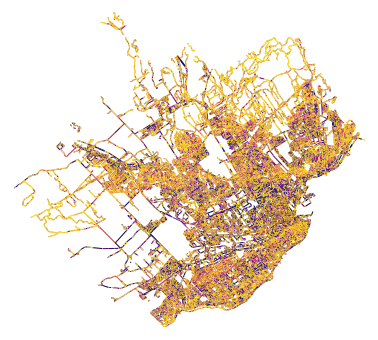

In [63]:
fig, ax = ox.plot_graph(graphQc , 
                        fig_height=6, 
                        node_color='#dddddd', 
                        node_size=0, 
                        node_zorder=2, 
                        edge_color= listGradeColors,
                        #close=False,
                        #show=False,
                        file_format='png', 
                        filename=os.path.join(ROOT_DIR,"Figures","qcCityGrades.png")
                       )
fig.savefig(os.path.join(ROOT_DIR,"Figures","qcEdgesGrade.png"))

cax = fig.add_axes([-2, 0.8, 2, 0.05])
im = ax.imshow(listGradeColors, cmap='plasma')
figBar=fig.colorbar(im,
                    cax=cax, 
                    orientation='horizontal') 

tick_locator = ticker.MaxNLocator(nbins=20)
figBar.locator = tick_locator
figBar.update_ticks()



In [64]:
shpQcCity = gpd.read_file(os.path.join(ROOT_DIR, "Data","GeoData","Neighbourhoods","vdq-quartier.shp"))
shpQcCity.head()

ID                                           NOM   SUPERFICIE  PERIMETRE  \
0   1                           Saint-Jean-Baptiste    678906.19    3781.17   
1   2                                     Cap-Rouge  12719875.43   19209.44   
2   3                            Cité Universitaire   7965511.15   12307.99   
3   4  Vieux-Québec/Cap-Blanc/Colline parlementaire   4293772.29   13796.73   
4   5                                   Des Châtels   9361555.58   16866.97   

                                            geometry  
0  POLYGON Z ((-71.21631942283598 46.812638240404...  
1  POLYGON Z ((-71.3937234763554 46.7584717847306...  
2  POLYGON Z ((-71.26750940561126 46.794866190810...  
3  POLYGON Z ((-71.20001449142366 46.813926919298...  
4  POLYGON Z ((-71.40300481113596 46.856427042165...

In [65]:
listCentralNeigh=["Saint-Jean-Baptiste","Saint-Roch","Vieux-Québec/Cap-Blanc/Colline parlementaire"]

In [66]:
dictCol={}
dictCol["Vieux-Québec/Cap-Blanc/Colline parlementaire"] = "blue"
dictCol["Saint-Jean-Baptiste"] = "black"
dictCol["Saint-Roch"] = "green"

In [67]:
listSubGraphsCentral,listNodesCentral,dfAllCentral= getSubgraphListAllNeighWithEdgesGrade(graphQc,  listCentralNeigh)

In [68]:
print([ k for k,v in listSubGraphsCentral.items() ])
listSubGraphsCentral[k]
dictCol['Saint-Jean-Baptiste']

['Saint-Jean-Baptiste', 'Saint-Roch', 'Vieux-Québec/Cap-Blanc/Colline parlementaire']


NameError: name 'k' is not defined

In [ ]:
for k,v in listSubGraphsCentral.items():
    ox.plot_graph(listSubGraphsCentral[k],
                 #edge_color=[dictCol[k] for s in listSubGraphsCentral[k].edges.data()]
                edge_color=["grey" for s in listSubGraphsCentral[k].edges.data()]
                 )

In [ ]:
dfAllCentral=dfAllCentral.assign(gradeAbsoluteVal = lambda x : np.abs(dfAllCentral.grade))
dfAllCentral.head()

In [ ]:
numQuantiles=20

listGradesAbsValue=[ abs(dat["grade"]) for u,v,dat in graphQc.edges.data() ]

#Set the color map
cNorm = matplotlib.colors.Normalize(vmin=1, vmax=numQuantiles)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.plasma)

#Get the quantiles
numQuantiles=20
series, bins = pd.qcut(x=listGradesAbsValue,
                        q=numQuantiles, 
                        labels=np.linspace(1,numQuantiles,numQuantiles), 
                        retbins=True)

colList = [scalarMap.to_rgba(i) for i in range(numQuantiles)]



In [ ]:
graphQc3Neigh, shpQc3Neigh, dfPointsSubsetQc3Neigh= getInducedSubgraphNeigh(graphQc, shpQcCity, "NOM", listCentralNeigh)

In [ ]:
#Get the colors
listEdgeColors3neigh=[  getColorFromElev(bins, colList, data["grade"]) for u,v,data in graphQc3Neigh.edges(data=True) ]

In [ ]:
fig,ax=ox.plot_graph(graphQc3Neigh,
                     fig_height=12, 
                     fig_width=12,
                             edge_color=listEdgeColors3neigh,
                     node_size=0,
                             show=False,
                             close=False)
    

listLegendHandles=[]
for k,row in shpQcCity.iterrows():
    if( np.isin(row.NOM ,  listCentralNeigh) ):
        patch=PolygonPatch(row.geometry, 
                           facecolor="white", 
                           edgecolor=dictCol[row.NOM],
                           linewidth=8,
                           alpha=0.2,
                           zorder=-1)
        ax.add_patch(patch )
        listLegendHandles.append(
            mpatches.Patch(color=dictCol[row.NOM],  label=row.NOM))

fig.suptitle("Streets with edge grades by neighbourhood") 
ax.legend(title="Neighbourhood",
           handles=listLegendHandles,
           loc="lower right")

fig.savefig(os.path.join(ROOT_DIR, "Figures", "qcGraphWithEdgesAndNeighbourhoods.png"))
 
